In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

**<font color='red'>1) Read raw dataset</font>**

In [2]:
X_raw=pd.read_csv("train.csv",sep=",")
X_raw






,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**<font color='red'>2) Convert to datetime64</font>**

In [4]:
X_raw["datetime"]=X_raw.astype("datetime64[ns]")
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB



<font color='green'>Define again all of the date columns</font>

In [5]:
X_raw['year'] = X_raw['datetime'].dt.year
X_raw['month'] = X_raw['datetime'].dt.month
X_raw['day'] = X_raw['datetime'].dt.day
X_raw['hour'] = X_raw['datetime'].dt.hour
X_raw.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


**<font color='red'>3) Dropping</font>**


In [6]:
drop_col=["datetime","casual","registered"]
X_raw.drop(drop_col, axis=1,inplace=True)


**<font color='red'>4) Reading of Test Data </font>**

In [7]:
test=pd.read_csv("test.csv")
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [8]:
test["datetime"]=test.astype("datetime64[ns]")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [9]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9


**<font color='red'>5) Examining of Missing Value</font>**

In [10]:
X_raw.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [11]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
dtype: int64

**<font color='red'>6) Explore Data</font>**

<AxesSubplot:xlabel='year', ylabel='count'>

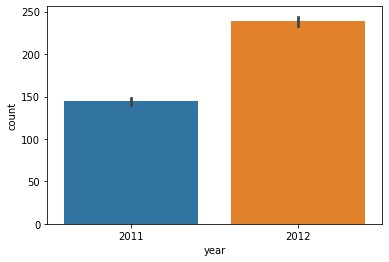

In [12]:

sns.barplot(data=X_raw, x="year", y="count")


<AxesSubplot:xlabel='temp', ylabel='count'>

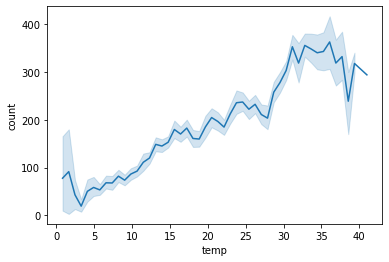

In [13]:

sns.lineplot(data=X_raw, x="temp", y="count")

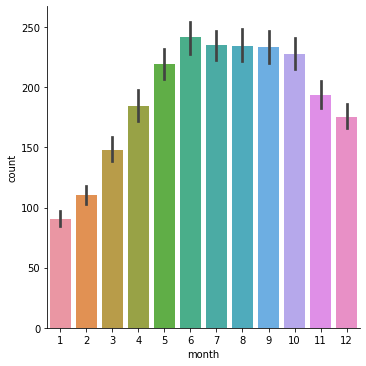

In [14]:
sns.catplot(data=X_raw, x="month", y="count",kind="bar")

<ipython-input-15-784e04ab37da>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_raw[['temp', 'windspeed']].hist(bins=20, ax=ax)


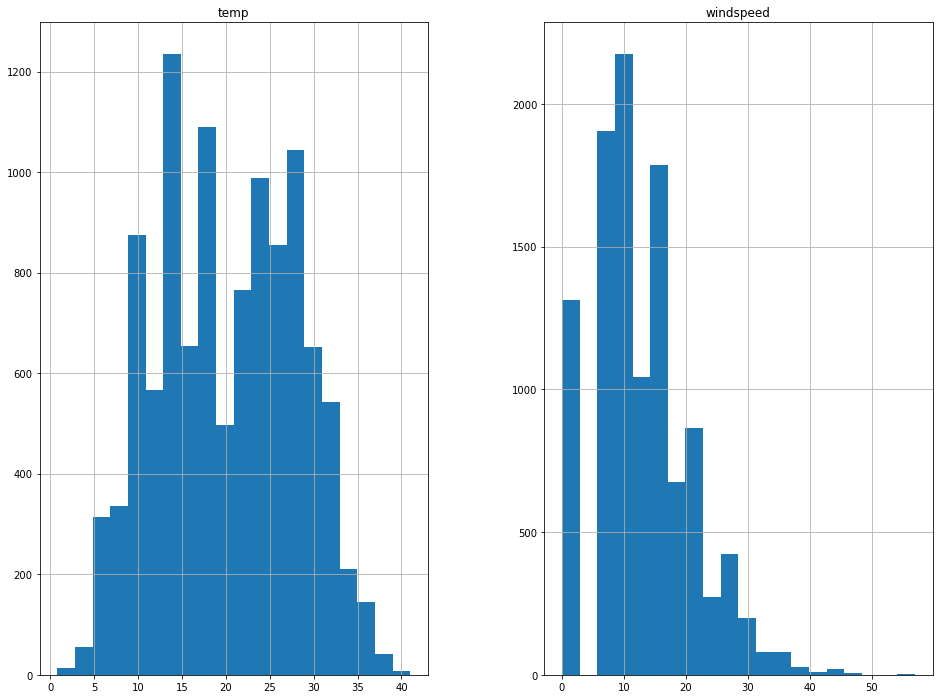

In [15]:
fig, ax = plt.subplots(figsize=(16,12))
 
X_raw[['temp', 'windspeed']].hist(bins=20, ax=ax)

plt.show()

<ipython-input-16-d39bbef20213>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_raw[['atemp', 'humidity']].hist(bins=20, ax=ax)


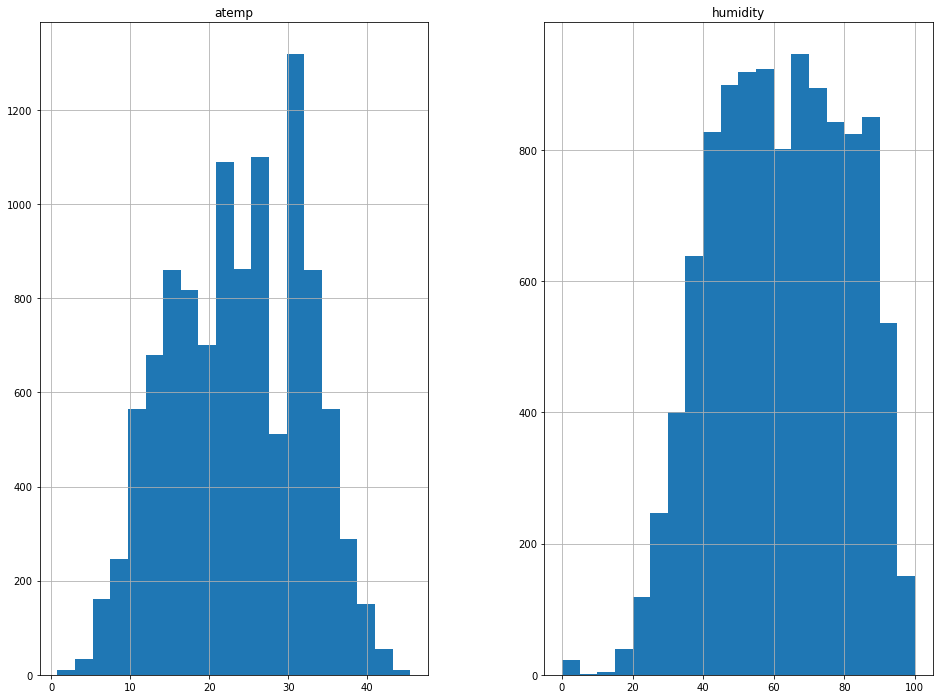

In [16]:
fig, ax = plt.subplots(figsize=(16,12))
 
X_raw[['atemp', 'humidity']].hist(bins=20, ax=ax)

plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

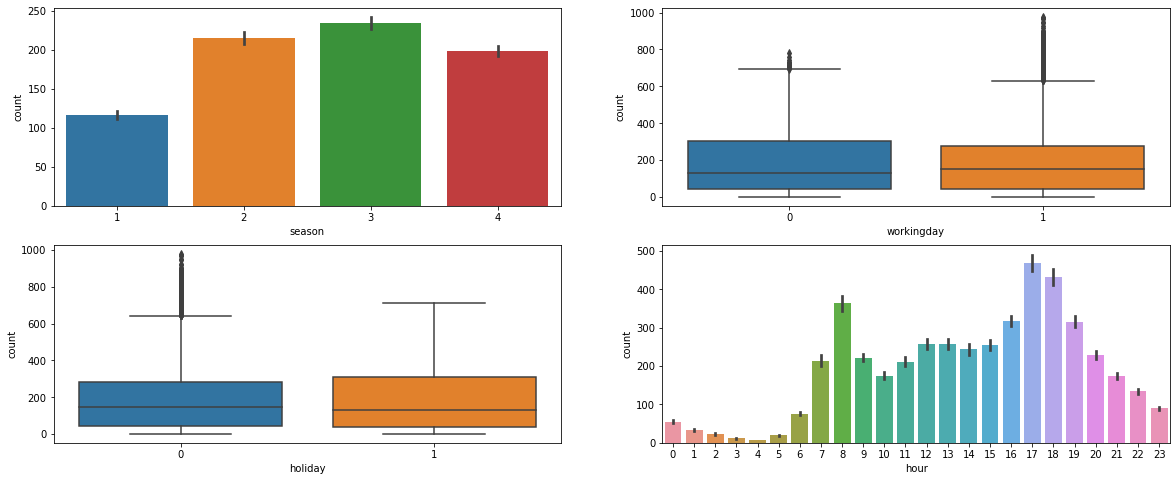

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.barplot(data=X_raw, x="season", y="count", ax=axes[0][0])#season
sns.boxplot(data=X_raw, x="workingday", y="count", ax=axes[0][1]) #Working day
sns.boxplot(data=X_raw, x="holiday", y="count", ax=axes[1][0]) #Holiday
sns.barplot(data=X_raw, x="hour", y="count", ax=axes[1][1]) 




(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

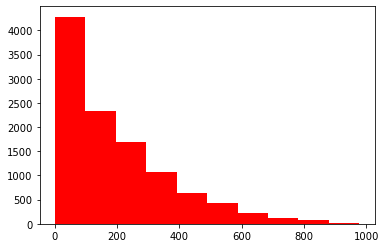

In [18]:
plt.hist(X_raw["count"],color="red")


**logaritmic function of y column**

In [19]:
X_raw["count"]=np.log1p(X_raw["count"])

(array([ 237.,  462.,  625.,  626.,  805., 1076., 1768., 2544., 2058.,
         685.]),
 array([0.69314718, 1.31238343, 1.93161968, 2.55085593, 3.17009218,
        3.78932843, 4.40856467, 5.02780092, 5.64703717, 6.26627342,
        6.88550967]),
 <BarContainer object of 10 artists>)

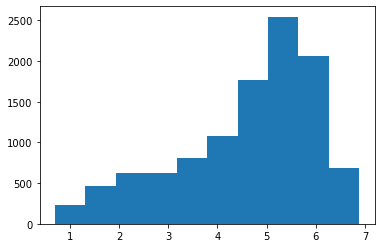

In [20]:
plt.hist(X_raw["count"])

**<font color='red'>7) Correlation Table</font>**

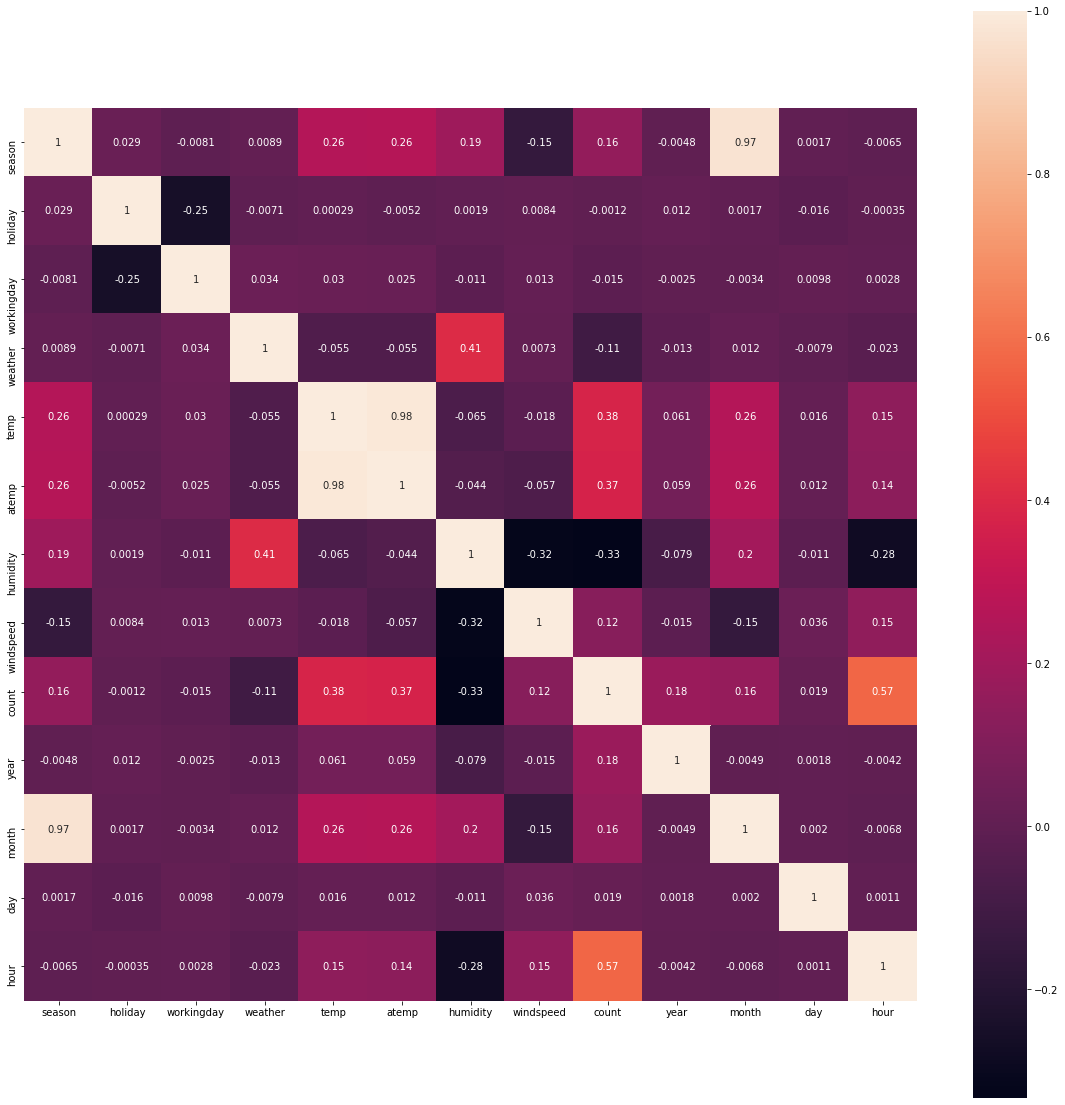

In [21]:
fig = plt.figure(figsize=[20,20]) #Heat map
ax = sns.heatmap(X_raw.corr(),annot=True,square=True)


**<font color='green'>Dropping Columns</font>**

In [22]:
drop_col2=["atemp","day","month"]
X_raw.drop(drop_col2,axis=1,inplace=True)


**<font color='green'>Split Train and Test Data</font>**

In [23]:
X=X_raw.drop("count",axis=1)
y=X_raw["count"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)


**<font color='red'>8) Create and Train the Model</font>**

In [24]:
m = LinearRegression()
m.fit(X_train,y_train)


LinearRegression()

In [25]:
l=m.score(X_train,y_train)
l

0.4831049953829707

In [26]:
v=m.score(X_test,y_test)
v

0.4869699052958547

**As we can see, after this dropping process I got my scores for train and test data sets. But this result is not sufficcent. I need to examine some strategies to increase score of model.  For example, I can expand my features. **

**<font color='red'>9) Feature Engineering</font>**

In [27]:
numerical_columns=["humidity","windspeed"]
categorical_columns=["holiday","workingday","weather","hour","season"]


categorical_pipeline= Pipeline([
    
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")
    )
])

polynomial_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False)),  
])

polynomial_pipeline2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False))    
])

numerical_pipeline= Pipeline([
    
    ("num_scaler",StandardScaler()) 

])


column_transformer=ColumnTransformer([
   ("categorical_pipeline",categorical_pipeline,categorical_columns),
   ("num_scaler",numerical_pipeline,numerical_columns),
   ("polynomial",polynomial_pipeline,["hour"]),
   #("numerical_poynomial",polynomial_pipeline3,numerical_columns),
   ("temp_pol",polynomial_pipeline2,["temp"])
])

column_transformer.fit(X_train)
X_train_fe =column_transformer.transform(X_train)
X_test_fe= column_transformer.transform(X_test)

In [28]:
m = LinearRegression()
m.fit(X_train_fe, y_train)
l=m.score(X_train_fe,y_train)
l

0.8068475232351283

In [29]:
t=m.score(X_test_fe,y_test)
t

0.8065160453080752

In [30]:
ypred_linear_test = m.predict(X_test_fe)
ypred_linear_test=np.exp(ypred_linear_test)-1
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred_linear_test)

45069.97314868008

In [31]:
scores = cross_val_score(m, X_train_fe, y_train, cv=5)
scores.round(3).mean()

-7.103533947121137e+20

**<font color='red'>10) Ridge Regularization</font>**

In [66]:
from sklearn.linear_model import Ridge

m_ridge = Ridge(alpha=0.8)
m_ridge.fit(X_train_fe, y_train)
ypred_ridge_train= m_ridge.predict(X_train_fe)

In [67]:
ypred_ridge_test = m_ridge.predict(X_test_fe)
ypred_ridge_test=np.exp(ypred_ridge_test)-1
ytrue_test=np.exp(y_test)-1
from sklearn.metrics import mean_squared_error
mean_squared_error(ytrue_test, ypred_ridge_test)

11800.94702875491

**<font color='red'>11) Cross Validation</font>**

In [68]:
scores = cross_val_score(m_ridge, X_train_fe, y_train, cv=5)
scores.round(3).mean()

0.8024000000000001

In [69]:
l=m_ridge.score(X_train_fe,y_train)
l

0.8072502807850446

In [36]:
t=m_ridge.score(X_test_fe,y_test)
t

0.8064690673786385

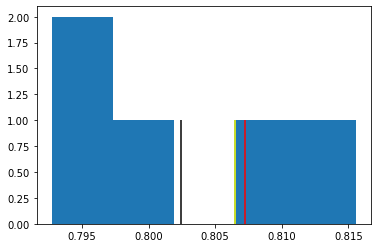

In [37]:
plt.hist(scores, bins=5) #it doesn't add much value for low ks
plt.vlines(scores.mean(),ymin=0,ymax=1, color='black')
plt.vlines(l,ymin=0,ymax=1, color='red') # this is the model score
plt.vlines(t,ymin=0,ymax=1, color='yellow') # this is the test score

**<font color='red'>12) Grid Search</font>**

In [38]:
from sklearn.model_selection import GridSearchCV

ridge_reg = Ridge()
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.3,0.5,0.8,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

Ridge_GS = GridSearchCV(ridge_reg,param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train_fe,y_train)
Ridge_GS.best_params_

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'alpha': 1, 'fit_intercept': False, 'solver': 'sag'}

In [39]:
ypred_ridge_test = Ridge_GS.predict(X_test_fe)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, ypred_ridge_test)

In [40]:
ypred1 = np.exp(ypred_ridge_test)-1

In [41]:
ypred2 = np.exp(y_test)-1

In [42]:
from sklearn.metrics import mean_squared_log_error
mean_squared_error(ypred2, ypred1)

11800.191414366172

**<font color='red'>13) Kaggle Score :0,63424</font>**

In [43]:
test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22


In [44]:
test_raw = test.drop(['atemp',"day","month"], axis=1)

In [45]:
X_kaggle=test_raw
X_kaggle

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,year,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027,2011,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000,2011,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000,2011,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014,2011,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014,2011,4
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014,2012,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014,2012,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014,2012,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981,2012,22


In [46]:
X_kaggle_dt=X_kaggle[["datetime"]]
X_kaggle_dt.reset_index(inplace=True,drop=True)

In [47]:
X_kaggle_dt

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00
...,...
6488,2012-12-31 19:00:00
6489,2012-12-31 20:00:00
6490,2012-12-31 21:00:00
6491,2012-12-31 22:00:00


In [48]:
X_kaggle_drop=X_kaggle.drop(["datetime"],axis=1)

In [49]:
X_kaggle_drop

,season,holiday,workingday,weather,temp,humidity,windspeed,year,hour
0,1,0,1,1,10.66,56,26.0027,2011,0
1,1,0,1,1,10.66,56,0.0000,2011,1
2,1,0,1,1,10.66,56,0.0000,2011,2
3,1,0,1,1,10.66,56,11.0014,2011,3
4,1,0,1,1,10.66,56,11.0014,2011,4
...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,19
6489,1,0,1,2,10.66,60,11.0014,2012,20
6490,1,0,1,1,10.66,60,11.0014,2012,21
6491,1,0,1,1,10.66,56,8.9981,2012,22


In [50]:
numerical_columns=["humidity","windspeed"]
categorical_columns=["holiday","workingday","weather","hour","season"]

In [51]:
categorical_pipeline= Pipeline([
    
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")
    )

])

In [52]:
polynomial_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False)),
    
])

In [53]:
polynomial_pipeline2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False))
    
])

In [54]:
numerical_pipeline= Pipeline([
    
    ("num_scaler",StandardScaler()),
    #("num_discritazer",KBinsDiscretizer(n_bins=15,strategy="uniform"))
    

])

In [55]:
column_transformer=ColumnTransformer([
   ("categorical_pipeline",categorical_pipeline,categorical_columns),
   ("num_scaler",numerical_pipeline,numerical_columns),
   ("polynomial",polynomial_pipeline,["hour"]),
   ("temp_pol",polynomial_pipeline2,["temp"])
])

In [56]:
column_transformer.fit(X_kaggle_drop)
X_kaggle_fe=column_transformer.transform(X_kaggle_drop)

In [57]:
X_kaggle_drop

,season,holiday,workingday,weather,temp,humidity,windspeed,year,hour
0,1,0,1,1,10.66,56,26.0027,2011,0
1,1,0,1,1,10.66,56,0.0000,2011,1
2,1,0,1,1,10.66,56,0.0000,2011,2
3,1,0,1,1,10.66,56,11.0014,2011,3
4,1,0,1,1,10.66,56,11.0014,2011,4
...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,19
6489,1,0,1,2,10.66,60,11.0014,2012,20
6490,1,0,1,1,10.66,60,11.0014,2012,21
6491,1,0,1,1,10.66,56,8.9981,2012,22


In [58]:
Y_pred_kaggle=Ridge_GS.predict(X_kaggle_fe)

In [59]:
Y_pred_kaggle

array([3.08667923, 2.60425728, 2.18715215, ..., 4.34245773, 4.15335994,
       3.72057452])

In [60]:
ypred = np.exp(Y_pred_kaggle)-1

In [61]:
ypred

array([20.90421812, 12.52117907,  7.90980321, ..., 75.89629788,
       62.64749336, 40.2881081 ])

In [62]:
df_y = pd.DataFrame(
            {'count': ypred,
           }
           )

In [63]:
df_y

,count
0,20.904218
1,12.521179
2,7.909803
3,3.981837
4,2.888418
...,...
6488,131.042958
6489,94.974880
6490,75.896298
6491,62.647493


In [64]:
X_final=X_kaggle_dt.join(df_y)

X_final

,datetime,count
0,2011-01-20 00:00:00,20.904218
1,2011-01-20 01:00:00,12.521179
2,2011-01-20 02:00:00,7.909803
3,2011-01-20 03:00:00,3.981837
4,2011-01-20 04:00:00,2.888418
...,...,...
6488,2012-12-31 19:00:00,131.042958
6489,2012-12-31 20:00:00,94.974880
6490,2012-12-31 21:00:00,75.896298
6491,2012-12-31 22:00:00,62.647493


In [65]:
X_final.to_csv("outzip_bike_train.csv",index=False)